In [1]:
import pandas as pd
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [47]:
import json
with open(r"C:/Users/nwntas/MFEde_UTR_5.json") as f :
    MFEde_UTR5=json.load(f)

In [48]:
MFEde_UTR5=dict(map(lambda x: (x[0][:-2],x[1]),filter(lambda x: x[0][-2:]==".1",MFEde_UTR5.items())))

In [49]:
Logs=dict(zip(df[df["Log ratio heat"]>1]["geneID"].to_list(),df[df["Log ratio heat"]>1]["Log ratio heat"].to_list()))

In [50]:
len(Logs)

2723

In [51]:
MFEde_UTR5=dict(filter(lambda x: x[0] in Logs.keys(),MFEde_UTR5.items()))

Logs=dict(filter(lambda x: x[0] in MFEde_UTR5.keys(),Logs.items()))

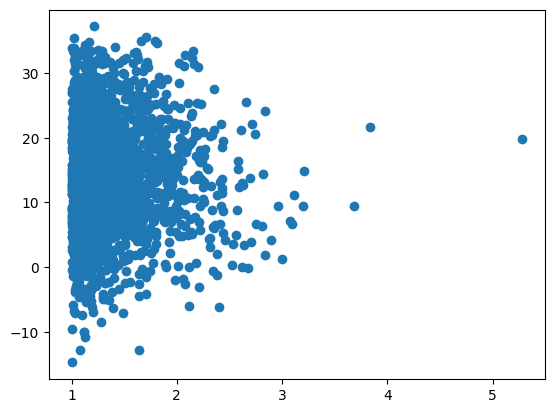

In [52]:
plt.scatter(list(Logs.values()),list(MFEde_UTR5.values()))

In [54]:
from scipy import stats
#stats.spearmanr(list(Logs.values()),list(MFEde_UTR5.values()))
pearsonr(list(Logs.values()),list(MFEde_UTR5.values()))

PearsonRResult(statistic=0.020935649406432607, pvalue=0.2976229796347192)

In [4]:
df=pd.read_excel(r"C:\Users\nwntas\Enriched transcripts.xlsx",skiprows=[0])

In [121]:
df2=pd.read_excel(r"C:\Users\nwntas\co_regulons_new_andria.xlsx", sheet_name="HS APEAL RIP up 0.8")

In [140]:
mock_enriched=df[df["Log ratio mock"]>1]["geneID"].to_list()

In [8]:
ns_enr=set(df2["AP NS ≥ 0.8"].to_list()).union(df2["PDL NS ≥ 0.8"].to_list())

In [ ]:
ns_down=set(df2["AP NS ≥ 0.8"].to_list()).union(df2["PDL NS ≥ 0.8"].to_list())

In [125]:
heat_down=df[df["Log ratio heat"]<-1]["geneID"].to_list()

In [619]:
aaa=set(df2["AP HS ≥ 1"].dropna().to_list()+df2["PDL HS ≥ 1"].dropna().to_list())&set(heat_enriched)

In [86]:
all_genes=df["geneID"].to_list()

In [25]:
df3=pd.read_excel(r"C:\Users\nwntas\P bodies interactome meta analytics_ANDRIA CORRECT values final.xlsx",skiprows=[0,1,2])

C:\Users\nwntas\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\nwntas\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [138]:
up_hs=set(df3[(df3["30 AP LOGratio"]>=0.8)|(df3["30 PDL LOGratio"]>=0.8)]["protein"].to_list())

up_ns=set(df3[(df3["22 AP LOGratio"]>=0.8)|(df3["22 PDL LOGratio"]>=0.8)]["protein"].to_list())

In [580]:
with open(r"C:\Users\nwntas\mock_up.fa","w") as f:
    for i in up_ns:
        if i in proteins.keys():
            f.write(f">{i}\n")
            f.write(f"{proteins[i]}\n")
        else:
            continue

In [701]:
no_hs=set(df3[(df3["30 AP LOGratio"]>0.8)|(df3["30 PDL LOGratio"]>0.8)]["protein"].to_list())

In [702]:
len(no_hs)

1242

In [703]:
len(down_hs)

1242

In [122]:
coRegs_heat=set(df2["Co-regulons"].dropna().to_list())

In [6]:
from collections import Counter

In [8]:
Gen_code={
    'Phe': ["TTT","TTC"],
    'Leu':["TTA","TTG","CTT","CTC","CTA",'CTG'],
    'Ile':["ATT","ATC","ATA"],
    'Met':["ATG"],
    'Val':["GTT","GTC","GTA","GTG"],
    'Ser':["TCT","TCC","TCA",'TCG',"AGT",'AGC'],
    'Pro':["CCT","CCC","CCA","CCG"],
    'Thr':['ACT',"ACC","ACA","ACG"],
    'Ala':["GCT","GCC","GCA","GCG"],
    'Tyr':["TAT","TAC"],
    'Ter':["TAA","TAG","TGA"],
    'His':["CAT","CAC"],
    'Gln':["CAA","CAG"],
    'Asn':["AAT","AAC"],
    'Lys':["AAA","AAG"],
    'Asp':["GAT","GAC"],
    'Glu':["GAA","GAG"],
    'Cys':["TGT",'TGC'],
    'Trp':["TGG"],
    'Arg':["CGT","CGC","CGA","CGG","AGA","AGG"],
    'Gly':['GGT',"GGC","GGA","GGG"]
}

In [83]:
#Based on calculations from "On the physical basis of the Amino Acid PR"
PYR_density={
    'Phe':5.0,
    'Leu':4.9,
    'Ile':4.9,
    'Met':5.3,
    'Val':5.6,
    'Ser':7.5,
    'Pro':6.6,
    'Thr':6.6,
    'Ala':7.0,
    'Tyr':5.4,
    'His':8.4,
    'Gln':8.6,
    'Asn':10.0,
    'Lys':10.1,
    'Asp':13.0,
    'Glu':12.5,
    'Cys':4.8,
    'Trp':5.2,
    'Arg':9.1,
    'Gly':7.9
}

In [99]:
#PUR affinity based on calculations from 
#"Evidence of direct complementary interactions between messenger RNAs and their cognate proteins"
PYR_density={
    'Phe':0.11,
    'Leu':0.03,
    'Ile':0.05,
    'Met':-0.12,
    'Val':-0.02,
    'Ser':0.04,
    'Pro':-0.06,
    'Thr':0.03,
    'Ala':0.02,
    'Tyr':0.09,
    'His':0.18,
    'Gln':0.04,
    'Asn':-0.03,
    'Lys':-0.07,
    'Asp':-0.01,
    'Glu':-0.15,
    'Cys':-0.13,
    'Trp':-0.16,
    'Arg':-0.01,
    'Gly':-0.02
}

In [21]:
amino_translation={
    "A":"Ala",
    "C":"Cys",
    "D":"Asp",
    "E":"Glu",
    "F":"Phe",
    "G":"Gly",
    'H':"His",
    "I":"Ile",
    "K":"Lys",
    "L":"Leu",
    "M":"Met",
    "N":"Asn",
    "P":"Pro",
    "Q":"Gln",
    "R":"Arg",
    "S":"Ser",
    "T":'Thr',
    "V":"Val",
    "W":"Trp",
    "Y":"Tyr"
}

In [11]:
#This can be used for CDS alignment without frame shifts
translation_table={item:[PYR_density[k] if j=="A" or j=="G" else 0 for j in item] for k,v in Gen_code.items() if k!="Ter" for item in v}

In [14]:
#CDS sequences downloaded from TAIR 11
dic=defaultdict(str)
with open("C:/Users/nwntas/Araport11_cds_20220914") as f:
    line='1'
    while line:
        line=f.readline().strip()
        if ">" in line:
            name=line[1:line.index("|")-1]
            continue
        dic[name]+=line

In [12]:
#CDS sequences downloaded from TAIR 11
di=defaultdict(str)
with open("C:/Users/nwntas/Araport11_cdna_20220914") as f:
    line='1'
    while line:
        line=f.readline().strip()
        if ">" in line:
            name=line[1:line.index("|")-1]
            continue
        di[name]+=line

In [13]:
cdna=dict(di)
cdna=dict(filter(lambda x: set(x[1])-{"A",'C',"G","T"}==set() and ".1" in x[0] and x[0] in cdna.keys(), cdna.items()))

In [18]:
start=defaultdict(int)
for k,v in cds.items():
    start[k]=cdna[k].index(v[:12])

In [19]:
start=dict(filter(lambda x: x[1]!=0,start.items()))

In [15]:
cds=dict(dic)

#These are the CDS excluding alternative splicing// No discernible difference regarding distribution or mean 
cds=dict(filter(lambda x: len(x[1])%3==0 and set(x[1])-{"A",'C',"G","T"}==set() and ".1" in x[0] and x[1][:3]=="ATG" and len(x[1])>3 and x[1][-3:]in ['TGA','TAA','TAG'], cds.items()))
#cds=dict(filter(lambda x: len(x[1])%3==0 and set(x[1])-{"A",'C',"G","T"}==set() and x[1][:3]=="ATG" and len(x[1])>3 and x[1][-3:]in ['TGA','TAA','TAG'], cds.items()))


codons=dict(map(lambda x: [x[0],[x[1][i:i+3] for i in range(0,len(x[1]),3)]],cds.items()))

In [9]:
list(filter(lambda x: ".19" in x, cds.keys()))

['AT1G06710.19', 'AT2G23985.19', 'AT4G16990.19', 'AT4G30820.19']

In [16]:
dic=defaultdict(str)
with open(r"C:\Users\nwntas\Araport11_pep_20220914") as f:
    line='1'
    while line:
        line=f.readline().strip()
        if ">" in line:
            name=line[1:line.index("|")-1]
            continue
        dic[name]+=line  

In [17]:
proteins=dict(dic)
proteins=dict(filter(lambda x: ".1" in x[0],proteins.items()))
proteins=dict(map(lambda x: (x[0][:-2],x[1][:-1]),proteins.items()))

In [57]:
def sequence_PYR_den(x,offset=0):
    x=x+".1"
    seq=codons[x][offset:]
    return [np.mean(list(map(lambda y:(y.count("C")+y.count("T"))/3,seq[i:i+21]))) for i in range(len(seq)) if len(seq)-21>i]

In [18]:
#This is probably a good way to calculate the affinity energy between mRNA-prot
def PYR_affinity_score(x):
    x=x+".1"
    return [sum([k for j in list(map(lambda y:translation_table[y],codons[x][i:i+21]))for k in j])/21 for i in range(len(codons[x])) if len(codons[x])-21>i]

In [58]:
#This is probably the correct way to calculate the PYR density pref for 
#Proteins
def PYR_PR(x):
    return [sum(list(map(lambda y: PYR_density[amino_translation[y]],proteins[x][i:i+21])))/21 for i in range(len(proteins[x])) if len(proteins[x])-21>i]

In [20]:
#This is probably the correct way to calculate the PYR density pref for 
#Proteins //Variation for human proteins
def PYR_PR_seq(x):
    return [sum(list(map(lambda y: PYR_density[amino_translation[y]],x[i:i+21])))/21 for i in range(len(x)) if len(x)-21>i]

In [119]:
def affinity_plot(seq):
    fig, ax=plt.subplots()
    line_1=sns.lineplot(x=list(range(len(sequence_PYR_den(seq)))),y=sequence_PYR_den(seq))
    ax.set_title(seq)
    ax.set_ylabel("PYR content/ mRNA sequence")
    ax.set_xlabel("21nt Window Interval")
    ax.text(128,0.7,f"R:{pearsonr(sequence_PYR_den(seq)[:-1],PYR_PR(seq))[0]}")
    ax_new = ax.twinx()
    line_2=sns.lineplot(x=list(range(len(PYR_PR(seq)))),y=PYR_PR(seq),color="orange")
    ax_new.set_ylabel("PYR density profile/ Protein")
    fig.legend(labels=["mRNA","Protein"],loc="upper right",bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
    ax_new.invert_yaxis()
    #plt.savefig(f"{seq}_coAlignment.png")
    return pearsonr(sequence_PYR_den(seq)[:-1],PYR_PR(seq))[0]

-0.5024251444242391

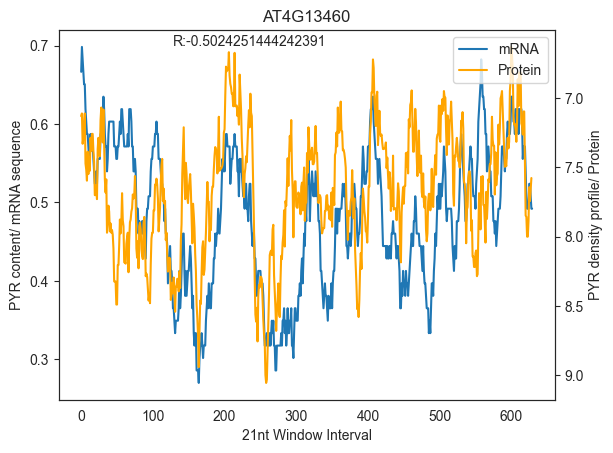

In [120]:
affinity_plot(co_Regs[0])

In [677]:
l=[]
for coReg in coRegs_heat:
    try:
        density=[k for k,v in offsettings(coReg,coReg)]
        content=[v for k,v in offsettings(coReg,coReg)]
        l+=[pearsonr(content,density)[0]]
    except KeyError:
        continue

In [94]:
l=[]
for coReg in coRegs_heat:
    try:
        l+=[pearsonr(sequence_PYR_den(coReg)[:-1],PYR_PR(coReg))[0]]
    except KeyError:
        continue

In [146]:
l1=[]
for coReg in mock_enriched:
    try:
        density=[k for k,v in offsettings(coReg,coReg)]
        content=[v for k,v in offsettings(coReg,coReg)]
        l1+=[pearsonr(content,density)[0]]
    except KeyError:
        continue
    except ValueError:
        continue

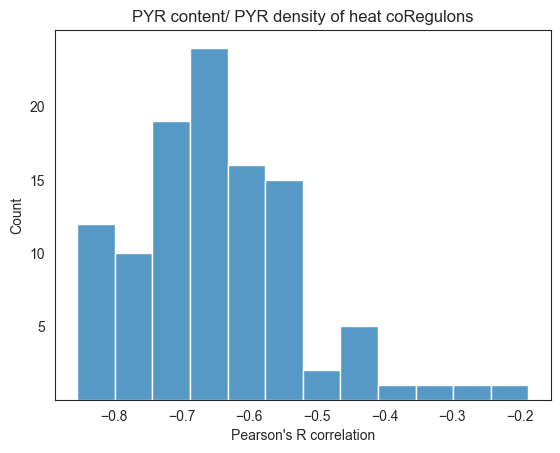

In [681]:
fig, ax=plt.subplots()
sns.histplot(l)
ax.set_yticks(np.arange(5,25,5))
#ax.legend(["Heat","Mock"])
ax.set_xlabel("Pearson's R correlation")
ax.set_title("PYR content/ PYR density of heat coRegulons")
plt.savefig("Correlation_distribution_heat_up.tiff")

In [ ]:
#integrating Frame Shifts

In [17]:
def offsetting(seq,offset):
    offset_list= list(zip(map(lambda x: amino_translation[x],proteins[seq]),codons[seq+".1"][offset:]))
    return [np.mean(list(map(lambda x: [PYR_density[x[0]] if j=="C" or j=="T" else 0 for j in x[1]],offset_list[i:i+21]))) for i in range(len(offset_list)) if len(offset_list)-21>i]

<AxesSubplot: >

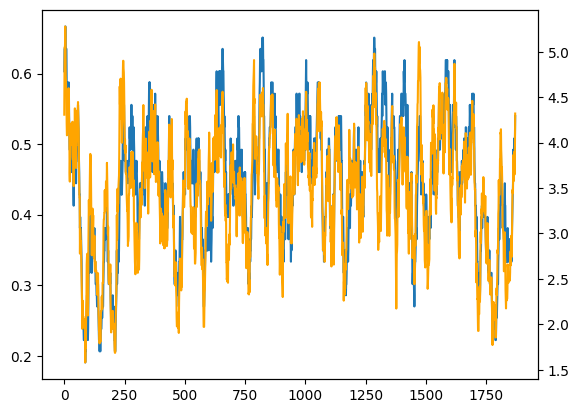

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax=plt.subplots()
sns.lineplot(x=list(range(len(sequence_PYR_den("AT1G01040",18)))),y=sequence_PYR_den("AT1G01040",18))
ax_new = ax.twinx()
sns.lineplot(x=list(range(len(offsetting("AT1G01040",18)))),y=offsetting("AT1G01040",18),color="orange")

In [18]:
from matplotlib import gridspec
from scipy.stats import pearsonr

In [697]:
import matplotlib.pyplot as plt
import seaborn as sns
def generate_plot(gene,location,save):
    density=[k for k,v in offsettings(gene,gene)]
    content=[v for k,v in offsettings(gene,gene)]

    gs=gridspec.GridSpec(2,1,height_ratios=[4,1])
    ax=plt.subplot(gs[0,0])
    line1, = ax.plot(list(range(len(content))),content)
    ax.set_ylabel("mRNA PYR density")
    ax.set_yticks(np.arange(0.2,1,0.2))
    ax_new = ax.twinx()
    line2, = ax_new.plot(list(range(len(density))),density,color="orange")
    ax_new.invert_yaxis()
    #ax_new.set_yticks(np.arange(5,10.5,1.5))
    ax_new.set_ylabel("Protein PYR affinity")

    lines=[line1,line2]
    labels=["mRNA","Protein"]
    plt.legend(handles=lines,labels=labels,loc=location)
    ax.set_title(f"{gene} | pearson's R:%.3f"%pearsonr(density,content)[0])

    ax1=plt.subplot(gs[1,0])
    norm_density=list(map(lambda x: 1-(x-min(density))/(max(density)-min(density)),density))
    norm_content=list(map(lambda x: (x-min(content))/(max(content)-min(content)),content))
    similarity_score=np.abs(np.array(norm_density)-np.array(norm_content))

    sns.lineplot(x=range(len(similarity_score)),y=similarity_score)
    ax1.set_ylim([0,0.7])
    ax1.set_ylabel("Absolute Distance")
    ax1.set_xlabel("Sequence bins")

    if save:
        plt.savefig(f"{gene}_cognate.tiff",dpi=600)

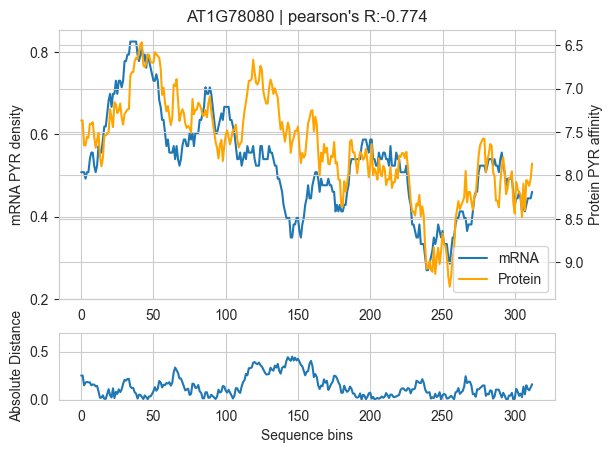

In [698]:
generate_plot("AT1G78080",location=4,save=False)

In [100]:
#This is basically the master function for offseting
def offsettings(seq,prot_seq,offset=0):
    codons_new=[cds[seq+".1"][k+offset:offset+k+3] for k in range(0,len(cds[seq+".1"][offset:]),3) if len(cds[seq+".1"][offset:])-3>k]
    offset_list= list(zip(map(lambda x: amino_translation[x],proteins[prot_seq]),codons_new))
    return [np.mean(list(map(lambda x: (PYR_density[x[0]],(x[1].count("G")+x[1].count("A"))/3),offset_list[i:i+21])),axis=0) for i in range(len(offset_list)) if len(offset_list)-21>i]

In [101]:
#This is basically the master function for offseting
def offsetting(seq,prot_seq,offset=0):
    codons_new=[cdna[seq+".1"][k+offset:offset+k+3] for k in range(0,len(cdna[seq+".1"][offset:]),3) if len(cdna[seq+".1"][offset:])-3>=k]
    offset_list= list(zip(map(lambda x: amino_translation[x],proteins[prot_seq]),codons_new))
    return [np.mean(list(map(lambda x: (PYR_density[x[0]],(x[1].count("G")+x[1].count("A"))/3),offset_list[i:i+21])),axis=0) for i in range(len(offset_list)) if len(offset_list)-21>i]

In [147]:
import random
pr=[]
for k in mock_enriched:
    if not k+".1" in start.keys() or not k+".1" in cdna.keys():
        continue
    frames=set(range(0,start[k+".1"]+len(cdna[k+".1"][start[k+".1"]:])-len(proteins[k])+1))-set(range(start[k+".1"]-2,start[k+".1"]+3))
    shifts=random.sample(frames,k=50)
    for shift in shifts:
        try:
            density=[k for k,v in offsetting(k,k,offset=shift)]
            content=[v for k,v in offsetting(k,k,offset=shift)]
            pr+=[pearsonr(density,content)[0]]
        except ValueError:
            continue
        except KeyError:
            continue

C:\Users\nwntas\AppData\Local\Temp\ipykernel_29532\1487839844.py:7: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  shifts=random.sample(frames,k=50)
C:\Users\nwntas\miniconda3\lib\site-packages\scipy\stats\_stats_py.py:4461: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(stats.NearConstantInputWarning(msg))
C:\Users\nwntas\miniconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [148]:
def random_encounter(k):
    pro=random.sample(list(filter(lambda x: x in proteins.keys(),up_ns)),k=1)[0]
    
    frames=set(range(0,start[k+".1"]+len(cdna[k+".1"][start[k+".1"]:])-len(proteins[pro])+1))-set(range(start[k+".1"]-2,start[k+".1"]+3))
    while not frames:
        pro=random.sample(list(filter(lambda x: x in proteins.keys(),up_hs)),k=1)[0]
        frames=set(range(0,start[k+".1"]+len(cdna[k+".1"][start[k+".1"]:])-len(proteins[pro])+1))-set(range(start[k+".1"]-2,start[k+".1"]+3))
    
    shift=random.sample(frames,k=1)[0]
    density=[k for k,v in offsetting(k,pro,offset=shift)]
    content=[v for k,v in offsetting(k,pro,offset=shift)]
    return pearsonr(density,content)[0]

In [149]:
rands=[]
for k in mock_enriched:
    if not k+".1" in start.keys() or not k+".1" in cdna.keys():
        continue
    for i in range(50):
        try:
            rands+=[random_encounter(k)]
        except ValueError:
            continue
        except KeyError:
            continue

C:\Users\nwntas\AppData\Local\Temp\ipykernel_29532\1632059676.py:9: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  shift=random.sample(frames,k=1)[0]


-0.0041127725477079855 -0.6376801722447786


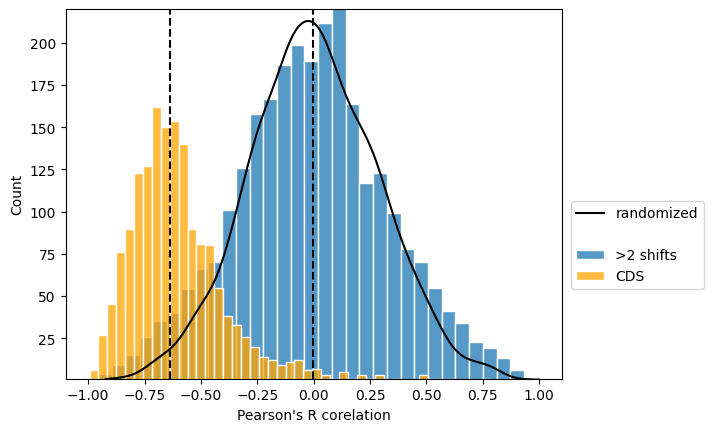

In [150]:
fig, ax=plt.subplots()

plt.rcParams["patch.force_edgecolor"] = True

randoms=random.sample(rands,k=len(heat_enriched))
shifts=random.sample(pr,k=len(heat_enriched))
print(np.median(randoms),np.median(l1))
sns.histplot(randoms,kde=True,alpha=0,color="k",edgecolor="white")
sns.histplot(shifts,edgecolor="white")
sns.histplot(l1,color='orange',edgecolor="white",linewidth=1)

ax.legend(bbox_to_anchor=(1.3,0.5),labels=["randomized","",">2 shifts","CDS"])

ax.set_xlabel("Pearson's R corelation")
ax.set_ylim([1,220])
ax.set_xlim([-1.1,1.1])

ax.axvline(np.median(randoms),linestyle="--",color="k")
ax.axvline(np.median(l1),linestyle="--",color="k")
plt.savefig("PBin_shifts_mock_PUR.tiff",dpi=300)

In [26]:
#Shifts distribution
p=[]
for i in range(len(cds[co_Regs[0]+".1"])-100):
    density=[k for k,v in offsetting(co_Regs[0],co_Regs[0],i)]
    content=[v for k,v in offsetting(co_Regs[0],co_Regs[0],i)]
    p+=[pearsonr(density,content)[0]]

In [156]:
np.median(l1)

-0.65323709093393

In [169]:
np.median(randoms)

-0.005305959236585818

In [28]:
p=[]
for i in co_Regs:
    if i!='AT1G10682' and i!='AT5G01215' and i!='AT3G23290':
        density=[k for k,v in offsetting(co_Regs[8],i)]
        content=[v for k,v in offsetting(co_Regs[8],i)]
        p+=[pearsonr(density,content)[0]]

In [107]:
p.index(min(p))

8

In [29]:
dimp=defaultdict(list)
for k in co_Regs:
    for j in co_Regs: 
        if j in proteins.keys():
            density=[k for k,v in offsetting(k,j)]
            content=[v for k,v in offsetting(k,j)]
            dimp[k]+=[pearsonr(density,content)[0]]

In [30]:
non_homo=dict(map(lambda x: (x[0],[(j,co_Regs[x[1].index(j)]) for j in x[1] if j<=-0.45 and co_Regs[x[1].index(j)]!=x[0]]),dimp.items()))

In [32]:
from collections import Counter
sorted(dict(Counter([j[1] for k in non_homo.values() for j in k])).items(),key=lambda x: x[1],reverse=True)

[('AT3G53120', 5),
 ('AT1G29850', 4),
 ('AT4G05000', 4),
 ('AT3G49910', 4),
 ('AT1G08370', 4),
 ('AT5G53330', 3),
 ('AT1G60430', 2),
 ('AT5G35980', 2),
 ('AT4G13460', 2),
 ('AT2G20550', 2),
 ('AT3G22270', 2),
 ('AT1G27430', 2),
 ('AT1G21130', 2),
 ('AT4G14990', 2),
 ('AT2G29200', 2),
 ('AT1G49760', 1),
 ('AT3G45640', 1),
 ('AT5G14200', 1),
 ('AT2G26080', 1),
 ('AT1G20070', 1),
 ('AT2G41090', 1),
 ('AT1G12200', 1),
 ('AT3G08670', 1)]

In [104]:
op=[]
for i in range(0,len(density),50):
    op+=[sm.pcm(np.array(density[i:i+50]),np.array(content[i:i+50]))]

In [109]:
list(range(0,len(density),50))

[0, 50, 100, 150]

In [160]:
norm_density=list(map(lambda x: 1-(x-min(density))/(max(density)-min(density)),density))

In [161]:
norm_content=list(map(lambda x: (x-min(content))/(max(content)-min(content)),content))

In [162]:
pearsonr(norm_content,norm_density)

PearsonRResult(statistic=0.7744127126476303, pvalue=8.584940660958723e-64)

In [44]:
import numpy as np
similarity_score=np.abs(np.array(norm_density)-np.array(norm_content))

<AxesSubplot: >

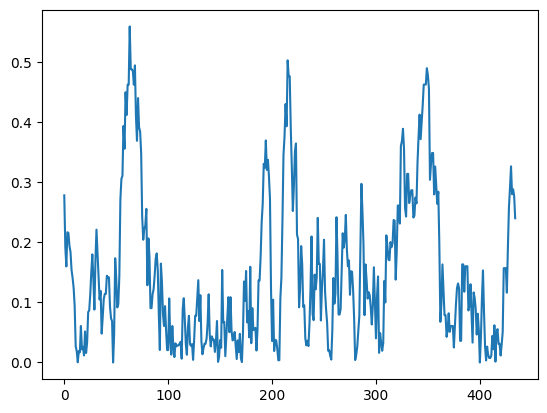

In [45]:
sns.lineplot(x=range(len(norm_density)),y=similarity_score)

<AxesSubplot: >

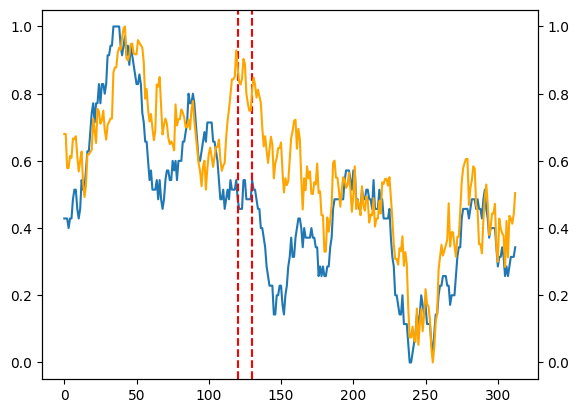

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
density=[k for k,v in offsetting("AT1G78080","AT1G78080")]
content=[v for k,v in offsetting("AT1G78080","AT1G78080")]
fig, ax=plt.subplots()
sns.lineplot(x=list(range(len(norm_content))),y=norm_content)
ax_new = ax.twinx()
ax.axvline(x=120, linestyle="--", color="red")
ax.axvline(x=130, linestyle="--", color="red")
sns.lineplot(x=list(range(len(norm_density))),y=norm_density,color="orange")
#ax_new.invert_yaxis()
#plt.savefig("heterologous_3.png")

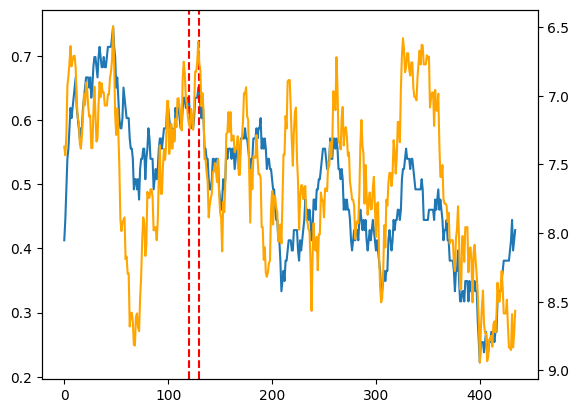

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
density=[k for k,v in offsetting(coRegs_mock[0],coRegs_mock[0])]
content=[v for k,v in offsetting(coRegs_mock[0],coRegs_mock[0])]
fig, ax=plt.subplots()
sns.lineplot(x=list(range(len(content))),y=content)
ax_new = ax.twinx()
ax.axvline(x=120, linestyle="--", color="red")
ax.axvline(x=130, linestyle="--", color="red")
sns.lineplot(x=list(range(len(density))),y=density,color="orange")
ax_new.invert_yaxis()
#plt.savefig("heterologous_3.png")

In [22]:
import similaritymeasures as sm

def PYR_distance(content,density,interval=10):
    content=np.array(content)
    density=np.array(density)
    density_norm=1-(density-np.min(density))/(np.max(density)-np.min(density))
    content_norm=(content-np.min(content))/(np.max(content)-np.min(content))
    return {f'{i}-{i+interval}':sm.pcm(np.array(list(enumerate(density_norm[i:i+interval]))),np.array(list(enumerate(content_norm[i:i+interval])))) for i in range(0,len(density),interval)}

In [241]:
PYR_distance(content,density,100)

{'0-100': 5.454478967416723,
 '100-200': 12.435389312465256,
 '200-300': 13.459319651005531,
 '300-400': 17.899229405809223,
 '400-500': 15.266352353349733,
 '500-600': 12.864055294445247,
 '600-700': 12.706569601147205,
 '700-800': 26.878540321427916,
 '800-900': 15.261831761482313,
 '900-1000': 17.476839427096152,
 '1000-1100': 7.79055439534475,
 '1100-1200': 6.54544233538215,
 '1200-1300': 17.089946670576524,
 '1300-1400': 17.038249441913027,
 '1400-1500': 11.274135611538979}

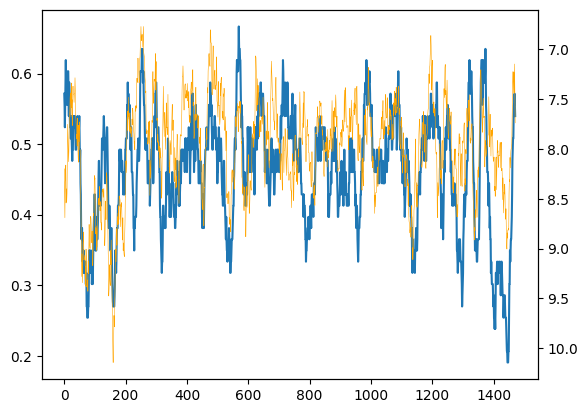

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns
density=[k for k,v in offsetting(co_Regs[18],co_Regs[18])]
content=[v for k,v in offsetting(co_Regs[18],co_Regs[18])]
fig, ax=plt.subplots()
sns.lineplot(x=list(range(len(content))),y=content)
#ax.axvline(x=50, linestyle="--", color="red")
#ax.axvline(x=110, linestyle="--", color="red")
ax_new = ax.twinx()
sns.lineplot(x=list(range(len(density))),y=density,color="orange",linewidth=0.4)
ax_new.invert_yaxis()
#plt.savefig("heterologous_2.png")

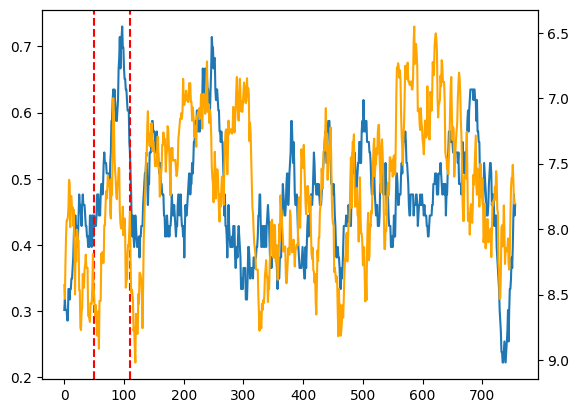

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
density=[k for k,v in offsetting(co_Regs[25],co_Regs[32])]
content=[v for k,v in offsetting(co_Regs[25],co_Regs[32])]
fig, ax=plt.subplots()
sns.lineplot(x=list(range(len(content))),y=content)
ax_new = ax.twinx()
ax.axvline(x=50, linestyle="--", color="red")
ax.axvline(x=110, linestyle="--", color="red")
sns.lineplot(x=list(range(len(density))),y=density,color="orange")
ax_new.invert_yaxis()
#plt.savefig("heterologous_1.png")

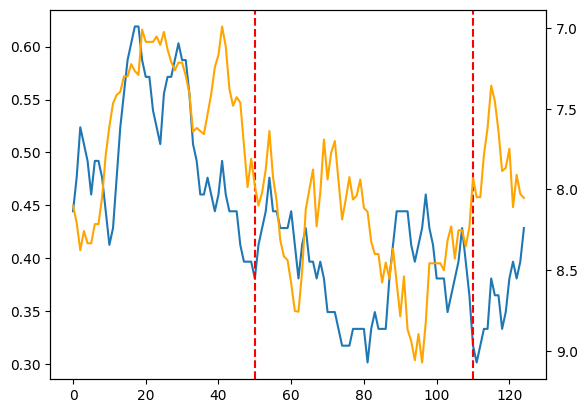

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns
density=[k for k,v in offsetting(co_Regs[33],co_Regs[32])]
content=[v for k,v in offsetting(co_Regs[33],co_Regs[32])]
fig, ax=plt.subplots()
sns.lineplot(x=list(range(len(content))),y=content)
ax_new = ax.twinx()
ax.axvline(x=50, linestyle="--", color="red")
ax.axvline(x=110, linestyle="--", color="red")
sns.lineplot(x=list(range(len(density))),y=density,color="orange")
ax_new.invert_yaxis()

In [142]:
proteins['AT3G53120'][40:110]

'QSSGQISAQVSPGEAAGIIVFLKDKSVDELRKLLSDKDAYQQFLLSLDQVKVQNNIKDELRRETLQLARD'

In [168]:
sm.pcm(np.array(density[10:50]),np.array(exp[10:50]))

9.41905918015264

In [173]:
density=np.array(density)

In [192]:
density_norm=1-(density-np.min(density))/(np.max(density)-np.min(density))

In [176]:
content=np.array(content)

In [188]:
content_norm=(content-np.min(content))/(np.max(content)-np.min(content))

In [26]:
examine_set=dict(filter(lambda x: x[0] in co_Regs,proteins.items()))

In [28]:
#Find the disaorder predictions for my coRegulon sequences
with open(r"C:/Users/nwntas/examine_set.txt","w") as f:
    for k,v in examine_set.items():
        f.write(f">{k}\n")
        f.write(f"{v}\n")

In [497]:
#Get a dictionary of the predictions
IU=defaultdict(list)
with open(r"C:\Users\nwntas\Downloads\examine_set.result") as f:
    line="1"
    while (line):
        line=f.readline()
        if ">" in line:
            sequence_name=line.strip()[line.strip().index(">")+1:]
        if len(line.split("\t"))==4 and not "#" in line:
            IU[sequence_name]+=[float(line.strip().split("\t")[2])]

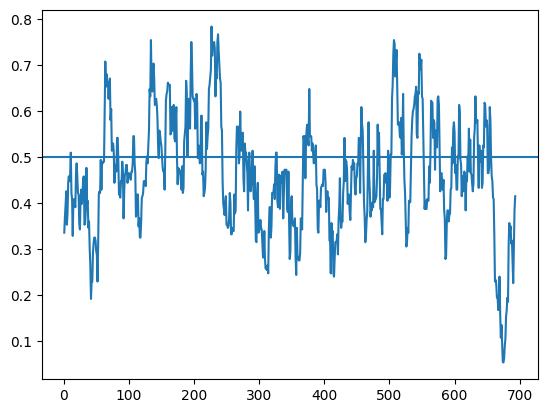

In [75]:
fig, ax=plt.subplots()
sns.lineplot(x=list(range(1,len(IU['AT1G33050'])+1)),y=IU['AT1G33050'])
ax.axhline(y=0.5)

In [216]:
#smooths out the variance and gives a similar comparable interval with previous calculations
means=[np.mean(IU['AT3G19720'][i:i+21]) for i in range(len(IU['AT3G19720'])) if len(IU['AT3G19720'])-21>i]

In [508]:
co_Regs=coRegs_heat_up

In [532]:
import matplotlib.pyplot as plt
import seaborn as sns

def give_plot(j):
    density=[k for k,v in offsettings(co_Regs[j],co_Regs[j])]
    content=[v for k,v in offsettings(co_Regs[j],co_Regs[j])]
    means=[np.mean(IU[co_Regs[j]][i:i+21]) for i in range(len(IU[co_Regs[j]])) if len(IU[co_Regs[j]])-21>i]
    fig, ax=plt.subplots()
    sns.set_style("white")
    sns.lineplot(x=list(range(len(content))),y=content)
    #The graphical representation of the disorder propensity
    #sns.lineplot(x=list(range(len(means))),y=means,color="green")

    ax.fill_between(np.arange(len(means)), np.zeros(len(means)), np.ones(len(means)), where=(np.array(means) < 0.5),
                    color='grey', alpha=0.1)
    ax.set_title(co_Regs[j])
    ax.set_ylabel('PYR content (%)')
    ax.set_ylim([0.05,1])
    #ax.set_xlim(0,380)
    ax_new = ax.twinx()
    #ax.axvline(x=120, linestyle="--", color="red")
    #ax.axvline(x=130, linestyle="--", color="red")
    sns.lineplot(x=list(range(len(density))),y=density,color="orange")
    ax_new.invert_yaxis()
    ax_new.set_ylabel("PYR affinity profile")
    plt.savefig(f"{co_Regs[j]}.tiff")
    return pearsonr(density,content)

PearsonRResult(statistic=-0.6725643544949855, pvalue=8.796195630578477e-87)

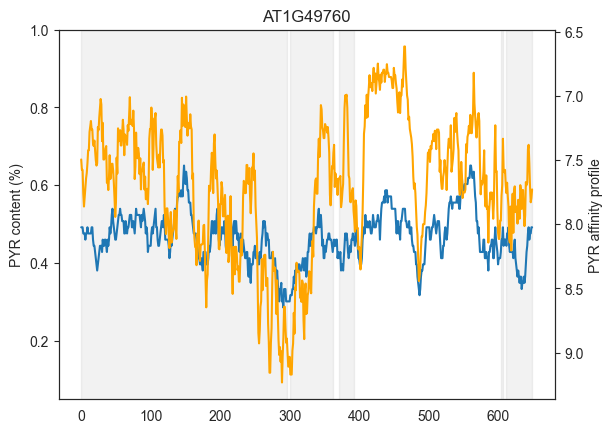

In [545]:
give_plot(61)

PearsonRResult(statistic=-0.5437550679330934, pvalue=5.798659002070601e-54)

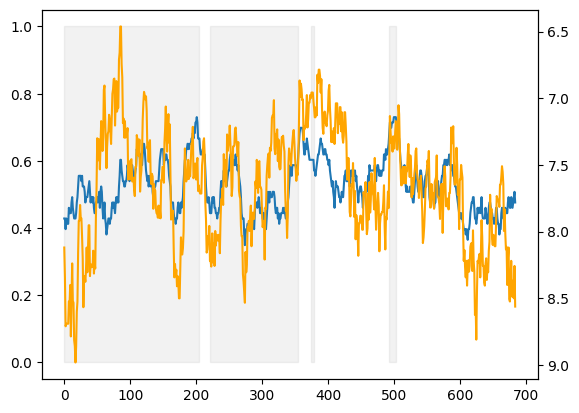

In [332]:
give_plot(31)

In [538]:
set(IU)&set(coRegs_heat_up)

{'AT1G08370',
 'AT1G12200',
 'AT1G20070',
 'AT1G21130',
 'AT1G27430',
 'AT1G29850',
 'AT1G33050',
 'AT1G35780',
 'AT1G49760',
 'AT1G55500',
 'AT1G58110',
 'AT1G60430',
 'AT2G20550',
 'AT2G26080',
 'AT2G29200',
 'AT2G35230',
 'AT2G40140',
 'AT2G41090',
 'AT3G07810',
 'AT3G08030',
 'AT3G08670',
 'AT3G19720',
 'AT3G22270',
 'AT3G27830',
 'AT3G45640',
 'AT3G46670',
 'AT3G49910',
 'AT3G53120',
 'AT4G05000',
 'AT4G13460',
 'AT4G14160',
 'AT4G14990',
 'AT5G09820',
 'AT5G12850',
 'AT5G14200',
 'AT5G23890',
 'AT5G35980',
 'AT5G47010',
 'AT5G47770',
 'AT5G53330'}

In [544]:
co_Regs.index("AT1G49760")

61

In [84]:
len(means)

672

In [124]:

l=[]
for j in co_Regs:
    density=[k for k,v in offsetting(co_Regs[co_Regs.index(j)],co_Regs[co_Regs.index(j)])]
    means=[np.mean(IU[j][i:i+21]) for i in range(len(IU[j])) if len(IU[j])-21>i]
    l+=[pearsonr(means,density)[0]]

In [125]:
l

[0.3475681731728012,
 0.47751889682489146,
 0.6484203051890033,
 0.50923573588916,
 -0.21716965993480108,
 0.4686217074549842,
 0.07599008038741084,
 0.4284415553504499,
 -0.24434917205524576,
 0.3977293282195946,
 0.0642552743899055,
 0.5634332131479503,
 0.3185570290877645,
 0.4375507627051517,
 0.25314644476841996,
 0.3727084262240701,
 0.5220096794418487,
 -0.349003112109411,
 0.31324583390365124,
 0.04232402936621581,
 0.38670849752659836,
 -0.17345054864359516,
 0.2875525204424295,
 0.3483676888253989,
 0.7818582248225183,
 -0.36429465613544165,
 0.3290020319710204,
 0.2684728073603075,
 0.5722866745329265,
 0.40219277369650736,
 0.23455398437290978,
 0.1884045713887595,
 0.6246620234458768,
 -0.27566698009490487]

<AxesSubplot: ylabel='Count'>

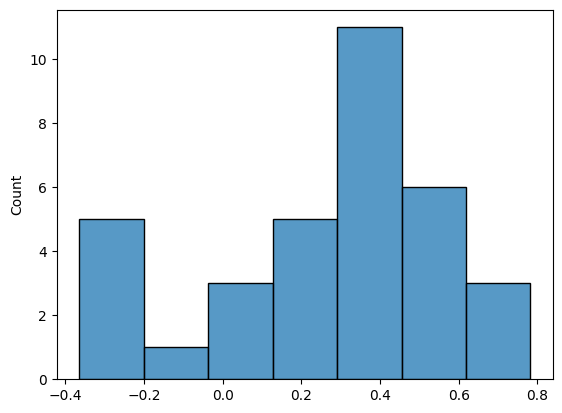

In [126]:
sns.histplot(l)

In [116]:
np.std(l)

0.29526951589101275

In [ ]:
#Cross-checking what i have found from a human dataset

In [255]:
human_RNA=pd.read_excel(r"C:\Users\nwntas\Downloads\RNA_seq_data_human.xlsx")

In [263]:
human_proteins=pd.read_excel(r"C:\Users\nwntas\Downloads\Protein_data_human.xlsx")

In [300]:
rna_gene_ids=human_RNA[(human_RNA["RNA enrichment in P-body (log2) (Fold change=sorted P-bodies/pre-sorted fraction)"]>0)&(human_RNA["adjusted p-value (FDR) of RNA enrichment "]<0.05)]["Associated Gene Name"].to_list()

In [302]:
protein_ids=human_proteins[(human_proteins["Protein enrichment in P-bodies (log2) (Fold change= sorted P-body/presorted fraction)"]>0)&(human_proteins[" p-value  of protein enrichment in P-bodies (Fisher's Exact Test)"]<=0.025)]["gene name"].to_list()

In [305]:
human_coRegs=list(set(rna_gene_ids)&set(protein_ids))

In [438]:
#These Ensembl ids were inserted into biomart and the CDS sequences were downloaded
ensembl_ids=human_RNA[human_RNA["Associated Gene Name"].isin(human_coRegs)]["Ensembl Gene ID"].to_list()

In [403]:
uniprot_ids=human_proteins[human_proteins["gene name"].isin(human_coRegs)]["gene name"].to_list()

In [312]:
#Creation of file of input to Ensembl
with open(r"C:\Users\nwntas\Ensemble_download.txt","w") as f:
    for i in ensembl_ids:
        f.write(f"{i}\n")

In [565]:
rna_human=defaultdict(str)
with open(r"C:\Users\nwntas\Downloads\mart_export.txt") as f:
    line="1"
    while line:
        line=f.readline()
        
        if ">" in line and line.strip()[1:] in rna_human.keys():
            line=f.readline()
            
            while not ">" in line and line.strip()[1:] in rna_human.keys():
                line=f.readline()
        
        if ">" in line:
            name=line.strip()[1:]
            continue
        
        if "unavailable" in line:
            continue
        
        if line=="\n":
            continue
            
        rna_human[name]+=line.strip()

In [567]:
trans=dict(zip(human_RNA["Ensembl Gene ID"].to_list(),human_RNA["Associated Gene Name"].to_list()))

In [568]:
#Temporarily only consider the human rnas as codons
codons=dict(map(lambda x: [x[0],[x[1][i:i+3] for i in range(0,len(x[1]),3)]],rna_human.items()))

In [569]:
codons=dict(map(lambda x: (trans[x[0]],x[1]),codons.items()))

In [335]:
import uniprot

In [414]:
#Downloaded all UniprotKB protein data from uniprot and filtered  for the 
#Uniprot ids of coRegulon proteins that belong to Homo sapiens

#Terrible code
with open(r"C:\Users\nwntas\uniprot_sprot.fasta") as f:
    l=[]
    line="1"
    while (line):
        line=f.readline().strip()
        if ">" in line:
            for j in uniprot_ids:
                if j in line and "sapiens" in line:
                    l+=[re.search(r"sp\|(\w+)",line).group(0)]

In [384]:
names,dicts=uniprot.read_fasta(r"C:\Users\nwntas\uniprot_sprot.fasta")

In [418]:
human_prots=dict(map(lambda x: (re.search(r"GN=(\w+)",x[1]["description"]).group(1),x[1]['sequence']),filter(lambda x: x[0] in l and "description" in x[1].keys(),dicts.items())))

In [430]:
#Getting the human protein sequences
human_prots=dict(filter(lambda x: x[0] in uniprot_ids,human_prots.items()))

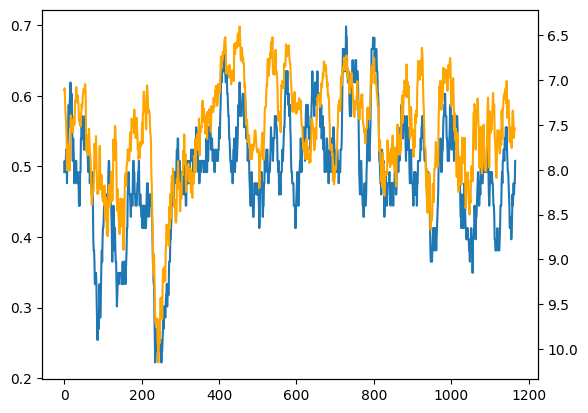

In [459]:
fig ,ax=plt.subplots()
sns.lineplot(x=list(range(len(sequence_PYR_den("PUM1")))),y=sequence_PYR_den("PUM1"))

ax_new=ax.twinx()
sns.lineplot(x=list(range(len(PYR_PR(human_prots["PUM1"])))),y=PYR_PR(human_prots["PUM1"]),color="orange")
ax_new.invert_yaxis()

In [570]:
#Printed genes correspond to not correctly matched pairs of proteins and RNAs// They are discarded
pear_scores=[]
for i in human_prots.keys():
    try:
        pear_scores+=[pearsonr(PYR_PR(human_prots[i]),sequence_PYR_den(i)[:-1])[0]]
    except ValueError:
        print(f"{i}")
        continue

EIF4ENIF1
AGO1
DCP1A
DCP2
DDX27
DDX6
DHX9
DSC1
ELAVL1
ELAVL2
GTPBP4
HNRNPU
IGF2BP2
ILF3
LSM14A
LSM14B
MEX3A
NCBP1
RBM19
RPF2
SF3B1
SMC3
SPTAN1
STAU2
TOP2A
XRCC5


<AxesSubplot: ylabel='Count'>

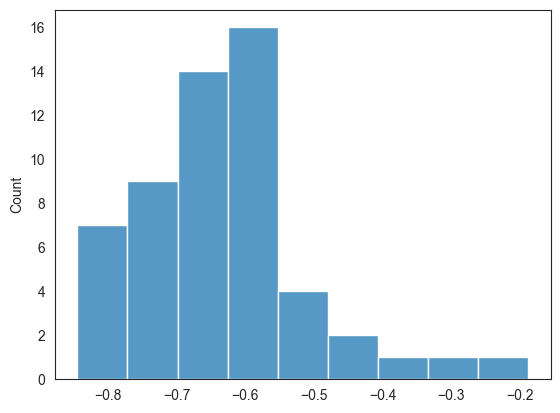

In [121]:
#This basically proves that the same condition applies to the coRegulons of other organisms

sns.histplot(p_coR)

In [ ]:
#Fourier transform

In [201]:
fft=np.fft.fft(PYR_PR(co_Regs[4])-np.mean(PYR_PR(co_Regs[4])))

In [202]:
magnitude=np.abs(fft)

In [203]:
n=len(PYR_PR(co_Regs[4]))

In [204]:
freq=np.fft.fftfreq(n)

<AxesSubplot: >

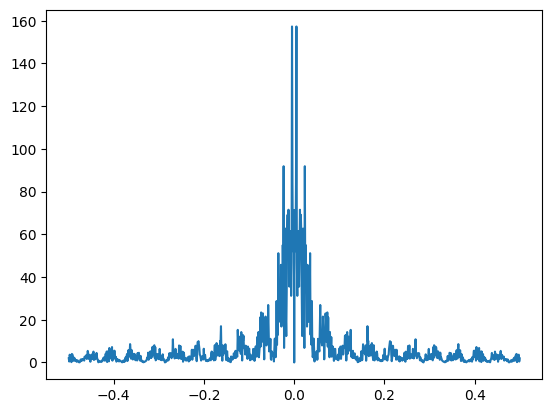

In [205]:
fig, ax=plt.subplots()
sns.lineplot(x=freq,y=magnitude)
#ax.set_xlim([-0.005,0.005])

In [443]:
def DFT(signal):
    n=len(signal)
    fft=np.fft.fft(signal-np.mean(signal))
    magnitude=np.abs(fft)
    freqs=np.fft.fftfreq(n)
    magnitude[magnitude/n<0.1]=0
    
    fig, ax=plt.subplots()
    sns.lineplot(x=freqs*n,y=magnitude/n)
    

    ax.set_xlim(-5,5)

153 153


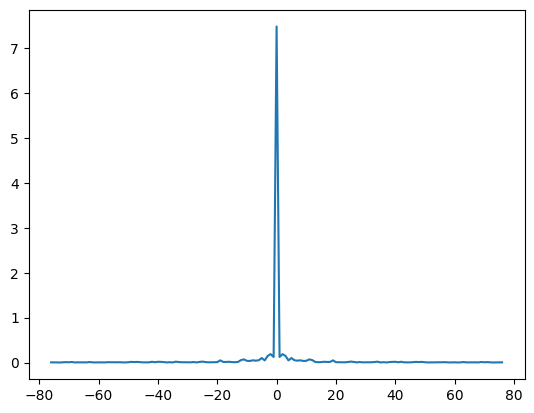

In [232]:
DFT(PYR_PR(co_Regs[23]))

In [247]:
import random

In [278]:
#random values sampled from a uniform distribution with the same plot 
#characteristics as the PR protein calculations
randnums=[random.uniform(min(PYR_PR(co_Regs[12])),max(PYR_PR(co_Regs[11]))) for i in range(len(PYR_PR(co_Regs[12])))]

349 349


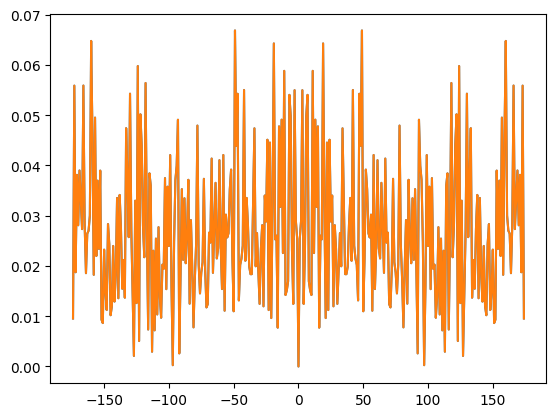

In [279]:
#We see that except the DC frequency that represents the mean value
#The rest possible periodic values have an almost equal effect on PR oscilation
DFT(randnums)

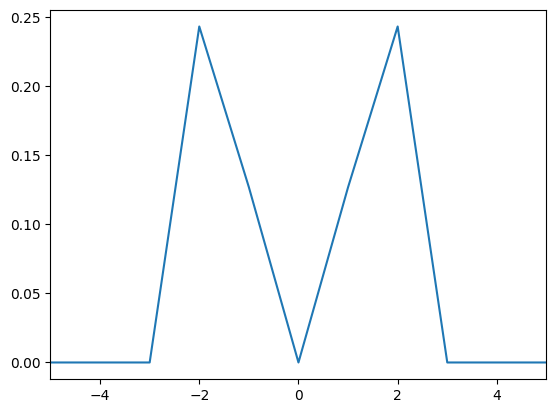

In [445]:
#For the PR data, this does not appear to be exactly the case
#The DC frequency still represents the main source of PR amplitude 
#though the periodic nature of the rest of the frequencies appears to somewhat
#Influence the output|
DFT(PYR_PR(co_Regs[9]))

#The periodic pattern appears to be unique for each sequence

In [286]:
from collections import Counter

In [289]:
ff={k:v/len(proteins[co_Regs[12]]) for k,v in Counter(proteins[co_Regs[12]]).items()}

In [416]:
pearsonr(np.abs(np.fft.fft(PYR_PR(co_Regs[12]))),np.abs(np.fft.fft(PYR_PR_seq(random_seq))))

PearsonRResult(statistic=0.9995801557837936, pvalue=0.0)

In [455]:
random_seq="".join(random.choices(list(ff.keys()),weights=np.ones(20)/20,k=len(proteins[co_Regs[12]])))

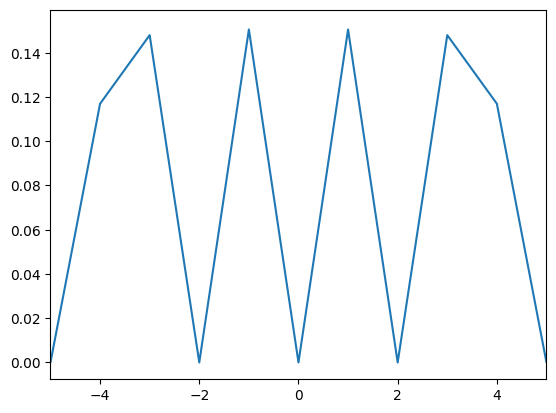

In [456]:
DFT(PYR_PR_seq(random_seq))

In [373]:
from scipy.stats import pearsonr

In [374]:
pearsonr(PYR_PR_seq(random_seq),PYR_PR(co_Regs[12]))

PearsonRResult(statistic=0.029664213091639243, pvalue=0.5807382713179545)

In [378]:
p=[]
for i in range(10_000):
    random_seq="".join(random.choices(list(ff.keys()),weights=list(ff.values()),k=len(proteins[co_Regs[12]])))
    sc=pearsonr(PYR_PR_seq(random_seq),PYR_PR(co_Regs[12]))[0]
    p+=[sc]

<AxesSubplot: ylabel='Count'>

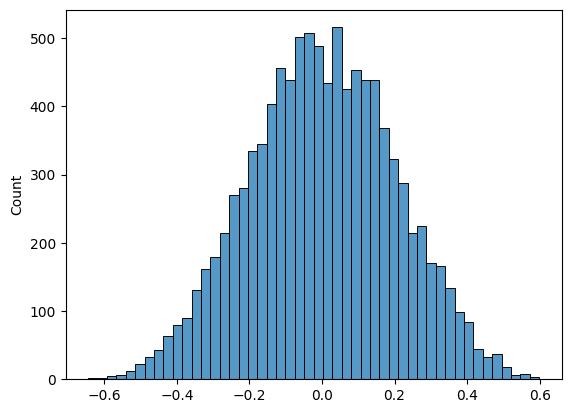

In [377]:
#Randomized frequency of each amino acid in the sequence
sns.histplot(p)

<AxesSubplot: ylabel='Count'>

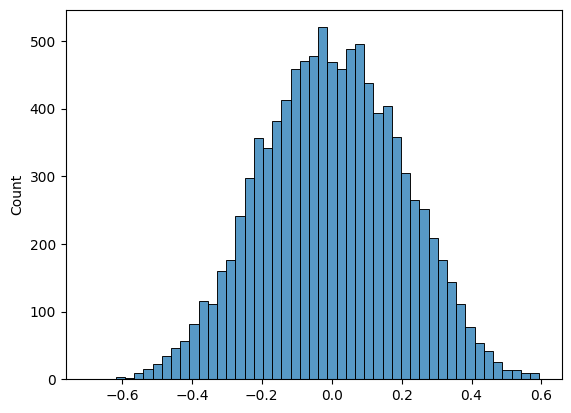

In [379]:
#Same frequency of amino acids as 12th co Reg, however different distribution
sns.histplot(p)

In [78]:
whole_transcr=[]
for i in proteins.keys():
    try:
        whole_transcr+=[pearsonr(sequence_PYR_den(i)[:-1],PYR_PR(i))[0]]
    except ValueError:
        print(f"{i}")
        continue
    except KeyError:
        print("Key")
        continue

Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
AT1G24660
Key
Key
AT1G33355
Key
Key
Key
Key
AT1G48355
Key
Key
Key
Key
AT1G54773
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
AT1G72755
Key
Key
Key
Key
Key
Key
Key
Key
Key
AT2G07617
Key
Key
Key
AT2G07642
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
AT2G25990
AT2G26515


C:\Users\nwntas\miniconda3\lib\site-packages\scipy\stats\_stats_py.py:4461: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(stats.NearConstantInputWarning(msg))


Key
Key
Key
Key
AT2G34655
AT2G35343
Key
Key
Key
Key
Key
Key
Key
Key
Key
AT3G02673
Key
Key
Key
Key
Key
Key
Key
AT3G13404
Key
Key
Key
Key
Key
Key
AT3G23122
Key
Key
AT3G26355
Key
Key
Key
Key
Key
Key
Key
AT3G44763
AT3G44766
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
AT4G11211
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
AT5G07545
Key
Key
Key
Key
Key
Key
Key
Key
Key
AT5G23115
AT5G24575
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
AT5G49645
Key
Key
Key
Key
Key
Key
Key
AT5G58790
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key
Key


In [38]:
co_Regs=list(co_Regs)

In [22]:
p_coR=defaultdict(float)
for i in df["geneID"].to_list():
    try:
        density=[k for k,v in offsetting(i,i)]
        content=[v for k,v in offsetting(i,i)]
        p_coR[i]=[pearsonr(density,content)[0]]
    except ValueError:
        p_coR[i]=np.nan
        continue
    except KeyError:
        p_coR[i]=np.nan
        continue

In [80]:
all_tr=[i[:-2] for i in cds.keys() if i[-2:]==".1" and not "*" in proteins[i[:-2]]]

In [86]:
density=[k for k,v in offsetting("AT1G12940","AT1G12940")]
content=[v for k,v in offsetting("AT1G12940","AT1G12940")]

In [90]:
pearsonr(density,content)

PearsonRResult(statistic=-0.6961770256795019, pvalue=5.805695269727133e-71)

In [22]:
from scipy import stats
from statannot import add_stat_annotation

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Transcriptome v.s. PB-Enriched: Custom statistical test, P_val:2.485e-01


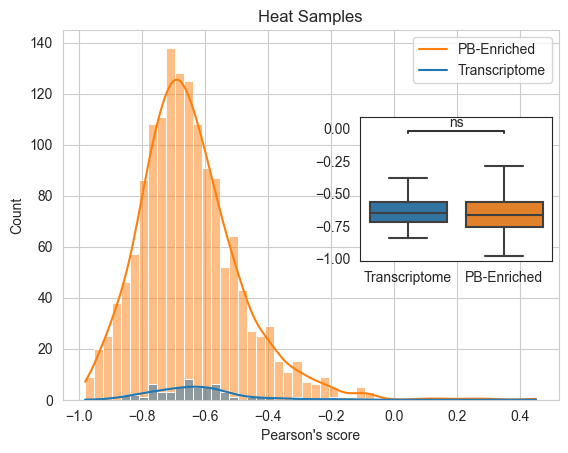

In [154]:
fig, ax=plt.subplots()
sns.set_style("white")
sns.histplot([p_coR,p[:1500]],bins=50,kde=True)
ax.legend(labels=['Transcriptome',"PB-Enriched"][::-1])
ax.set_title('Heat Samples')
ax.set_xlabel("Pearson's score")
ax_sub=fig.add_axes([0.59, 0.4,0.3,0.3])


sns.set_style("whitegrid")
sec=sns.boxplot(data=[p_coR,p[:1500]], 
            showfliers=False)

#ax_sub.set_ylabel("compAI score")
ax_sub.set_xticklabels(['Transcriptome',"PB-Enriched"])

add_stat_annotation(ax=sec,x=['Transcriptome',"PB-Enriched"],
                                           y=[np.median(p_coR),np.median(p)],
                                           box_pairs=[('Transcriptome',"PB-Enriched")],
                                           pvalues=[stats.mannwhitneyu(p_coR,p[:1500])[1]],
                                           text_format="star",
                                           loc="inside",
                                           verbose=1,
                                           perform_stat_test=False,
                                           line_offset_to_box=0.8)

plt.savefig("Cognate_heat_vs_Transcriptome.tiff")

In [97]:
len(p)

27346

In [101]:
stats.mannwhitneyu(p_coR,p[:54])[1]

0.40465676192728617

In [126]:
np.mean(p)

nan

In [136]:
list(filter(lambda x: type(x)==np.nan,p))

[]

In [135]:
type(p[0])

numpy.float64

In [25]:
import json

In [26]:
with open(r"C:\Users\nwntas\cognate_scores.json") as f:
    scores=json.load(f)

In [54]:
mock_out=list(map(lambda x: x[1][0], filter(lambda x: x[0] in mock_enriched and type(x[1])==list,scores.items())))

In [55]:
len(mock_enriched)

506

In [35]:
import numpy as np

In [42]:
type(scores['AT1G08370'])

list

In [683]:
ph=[PYR_PR(i) for i in list(up_hs)[1:] if i in proteins.keys()]

In [686]:
#nh=[PYR_PR(i) for i in list(up_ns)[1:] if i in proteins.keys()]

In [685]:
l=[]
for i in up_ns:
    try:
        l+=[PYR_PR(i)]
    except KeyError:
        print(i)
        continue

ATMG00510
AT3G60240
AT4G17100


In [687]:
a=np.concatenate(ph)

In [688]:
b=np.concatenate(l)

In [689]:
ps=list(map(lambda x: "ns"if x>=0.05 else "$"+f"{x:.2e}"f"{x}"[:f"{x:.2e}".index("-")].replace("e","\cdot10^{%s}"%f"{x:.2e}"[f"{x:.2e}".index("-"):])+"$",[stats.mannwhitneyu(a,b)[1]]))

Heat v.s. Mock: Custom statistical test, P_val:5.075e-67


(<Axes: >, [<statannot.StatResult.StatResult at 0x1e2132af6a0>])

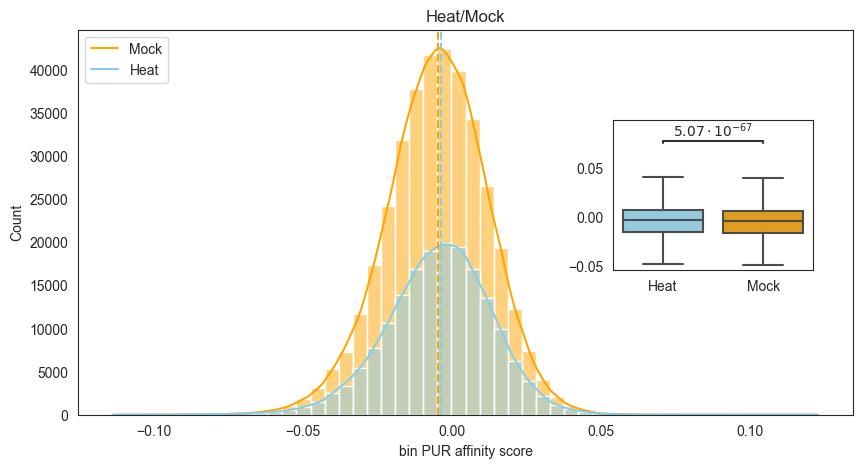

In [690]:
fig, ax=plt.subplots(figsize=(10,5))
sns.set_style("white")
sns.histplot([a,b],bins=50,kde=True,palette=["#87CEEB","#FFA500"])
ax.legend(labels=['Heat',"Mock"][::-1],loc=2)
ax.set_title('Heat/Mock')
ax.set_xlabel("bin PUR affinity score")
ax_sub=fig.add_axes([0.66, 0.4,0.2,0.3])
ax.axvline(np.median(a),color="#87CEEB",linestyle="--")
ax.axvline(np.median(b),color="#FFA500",linestyle="--")

#ax.set_ylim([1,44000])
sns.set_style("whitegrid")
sec=sns.boxplot(data=[a,b], 
            showfliers=False,palette=["#87CEEB","#FFA500"])

ax_sub.set_xticklabels(['Heat',"Mock"])

add_stat_annotation(ax=sec,x=['Heat',"Mock"],
                                           y=[np.median(a),np.median(b)],
                                           box_pairs=[('Heat',"Mock")],
                                           pvalues=[stats.mannwhitneyu(a,b)[1]],
                                           text_format="simple",
                                           text_annot_custom=ps,
                                           loc="inside",
                                           verbose=1,
                                           perform_stat_test=False,
                                           line_offset_to_box=0.8)

#plt.savefig("PUR_Mock_vs_Heat.tiff")

In [180]:
stats.mannwhitneyu(a,b,alternative="greater")

MannwhitneyuResult(statistic=59248391417.5, pvalue=0.0)